# Dashboard


---

*Antonio Emanuele Cinà, Assistant Professor @ University of Genoa*

**Analisi e Rappresentazione dei Dati** --
6 Maggio 2024

## Lezione 10: Dashboard 2 - Grafici e Callback


Materiale: https://tinyurl.com/ARD2024-L10

In [ ]:
!pip install -q dash dash-bootstrap-components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 14.4 MB/s eta 0:00:00


# Callback

Le callback sono funzioni che vengono utilizzate **automaticamente** da Dash ogni volta che una proprietà di un componente di input cambia. Queste vengono utilizzate per aggiornare proprietà di altri componenti (l'output).

Le callback vengono implementate come *decoratori* di una funzione attraverso la sintassi
```
@callback(OutputComponent(output_component_id,output_component_property),
          InputComponent(input_component_id,input_component_property))
def nome_funzione(input_component_property_value):
```


Al parametro `component_id` dobbiamo passare l'identificativo del componente con cui stiamo interagendo.

Il parametro `component_property` fa riferimento alla proprietà coinvolta nella "lettura", nel caso di input, e "scrittura", nel caso di output.


Ogni componente di plotly, e dash_bootstrap_components, contiene varie proprietà. In particolare quelle più utilizzate sono:

- `children`, può essere un componente singolo, una lista di componenti, una stringa o un numero. Lo si utilizza per inserire contenuti all'interno di quel componente. Di default il primo parametro di qualsiasi componente (e.g., Row, Col) è il children.

- `id`, serve per identificare il componente. Deve essere univoco per poter essere identificato dalla callback.

- `class_name`, per dbc, o `className`, per plotly, viene utilizzato per definire il CSS per lo stile.

- `value`, contiene il valore del componente.

- `figure`, utilizzata nei i grafici, è la proprietà dove viene assegnato il grafico.


Ogni componente ha la sua proprietà, per esempio queste sono le proprietà del componente [Input](https://dash-bootstrap-components.opensource.faculty.ai/docs/components/input/).

Facciamo subito un esempio:

In [ ]:
import dash_bootstrap_components as dbc
from dash import Dash, Input, Output, html, dcc
import plotly.express as px


app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container(children= [
              # Componente Input, dove possiamo scrivere del testo
              dbc.Input(id="input-id", placeholder="Type something...", type="text"),
              # Crea uno spazio
              html.Br(),
              # Componente di paragrafo
              html.P(id="output-id", children="..."), # Di default il valore children è uguale alla stringa vuota
              # Componente per scrivere del testo in Markdown
              dcc.Markdown(children=

                            In questo esempio pratico, ogni volta che viene digitato un carattere nel componente `Input`, il paragrafo
                            P viene aggiornato.

                            L'utilizzo della callback crea la seguente interazione:

                            1. Dal componente con id "input-id" viene preso il campo "value".

                            2. Il valore viene passato alla funzione `output_text` come parametro `testo`.

                                Qui la funzione processa il testo e ritorna una stringa.

                            3. La nuova stringa viene scritta nella proprietà "children" del componente con `id=output-id`.
                            ''') # ''' viene utilizzata per creare una stringa multilinea
              ])

# Decoratore per creare una callback
@app.callback(Output("output-id", "children"), Input("input-id", "value"))
def output_text(input_value):
    if len(input_value) == 0:
      return input_value

    pari = len(input_value)%2 == 0

    if pari:
      return f'Il testo:"{input_value}" è di lunghezza PARI'
    else:
      return f'Il testo:"{input_value}" è di lunghezza DISPARI'

app.run_server()

<IPython.core.display.Javascript object>

# Grafici

Abbiamo già visto come creare e personalizzare i grafici su plotly, vediamo ora come integrarli nella dashboard.

Integrare i grafici nella dashboard è molto semplice, basta utilizzare il componente `dcc.Graph()`. Utilizziamo principalmente due parametri:

1. `id` per impostare l'identificativo;

2. `figure`, che viene utilizzato per renderizzare i grafici. Questa property può essere inizializzata subito passando un grafico di plotly, oppure può essere cambiata da una callback attraverso `output_component_property`.

In questo esempio viene utilizzato il distplot degli scontrini della lezione "Plolty-II". Nel primo esempio viene mostrato come fare una dashboard con due grafici uno sopra l'altro, nel secondo esempio i grafici sono uno a fianco all'altro.

In [ ]:
import dash_bootstrap_components as dbc
from dash import Dash, Input, Output, html, dcc
import plotly.express as px

# carichiamo il dataaset
df = px.data.tips()

# Creiamo il grafico
fig_bill_tip = px.histogram(df, x="total_bill", y="tip", color="sex",
                   marginal="box", title="distplot 1",
                   hover_data=df.columns, width=500, height=300)

# Riduciamo i margini della figura
fig_bill_tip.update_layout(
    margin=dict(l=50, r=50, t=50, b=50),
)

# ------------------------------


app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container(children=[
              # Riga per il titolo
              dbc.Row(dbc.Col(html.H1("Due grafici in verticale"), width="auto"), justify="center"),
              # Riga per il primo grafico
              dbc.Row(
                dbc.Col(
                  # Inizializza prima il grafico e poi assegnalo al dcc.Graph. Soluzione piu' ordinata.
                  children=dcc.Graph(figure=fig_bill_tip) # qui specifico children, per gli altri è già segnato di default
                )
              ),
              # Riga per il secondo grafico
              dbc.Row(
                dbc.Col(
                  # Il grafico viene creato direttamente nel componente
                  dcc.Graph(figure=px.histogram(df, x="total_bill", y="tip", color="sex",
                                                marginal="box", title="distplot 1",
                                                hover_data=df.columns, width=500, height=300)
                  )
                )
              )
            ], fluid = True) # fluid = True, dice al container di prendere tutto lo spazio disponibile


app.run_server()

<IPython.core.display.Javascript object>

In [6]:
import dash_bootstrap_components as dbc
from dash import Dash, Input, Output, html, dcc
import plotly.express as px


df = px.data.tips()

fig_bill_tip = px.histogram(df, x="total_bill", y="tip", color="sex",
                   marginal="box", title="distplot 1",
                   hover_data=df.columns, width=800, height=300)


fig_bill_tip.update_layout(
    margin=dict(l=50, r=50, t=50, b=50),
)

# ------------------------------


app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
              # riga per il titolo
              dbc.Row(dbc.Col(html.H1("Due grafici affiancati"), width="auto"), justify="center"),
              # riga per i grafici
              dbc.Row(children=[
                # primo grafico
                dbc.Col(dcc.Graph(figure=fig_bill_tip), width="auto"), # width = "auto", la larghezza viene assegnata in automatico
                # secondo grafico
                dbc.Col(dcc.Graph(figure=fig_bill_tip), width="auto")
                ], justify="center" # I grafici vengono "centrati"
              )
            ], fluid = True)

app.run_server()


<IPython.core.display.Javascript object>

## Callback e grafici


Ora estendiamo la dashboard precedente utilizzando sia le Callback che i Graph: facciamo scegliere all'utente che tipo di distribuzione marginale visualizizare tramite un [RadioItem](https://dash-bootstrap-components.opensource.faculty.ai/docs/components/input/).

In questo caso creiamo un **RadioItem** con 3 scelte: "box","violin" e "rug".

Poi creiamo un `dcc.Graph` con un `id` così possiamo aggiornare il grafico attraverso una funzione (con callback).

In [7]:
import dash_bootstrap_components as dbc
from dash import Dash, Input, Output, html, dcc
import plotly.express as px


df = px.data.tips()

# Creaiamo il RadioItem
radio_item_box = dbc.RadioItems(
                      # Sono le 3 opzioni
                      options=[
                          {"label":"BoxPlot", "value":"box"}, # opzione boxplot
                          {"label":"ViolinPlot", "value":"violin"}, # opzione violinplot
                          {"label":"RugPlot", "value":"rug"} # opzione rugplot
                      ],
                      # Impostiamo il valore di default
                      value="box",
                      # inline = True mette i 3 bottoni in linea invece che verticale
                      inline=True,
                      id="radio-input"
                    )

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container(children=[
              # La prima riga contiene il RadioItem
              dbc.Row(
                dbc.Col(children=radio_item_box)
              ),
              # La seconda riga contiene il Grafico
              dbc.Row(
                dbc.Col(children=dcc.Graph(id="output-histogram"))
              )
            ], fluid=True)

@app.callback(Output('output-histogram', 'figure'),
          Input('radio-input', 'value'))
def update_distplot(radio_value):
  return px.histogram(df, x="total_bill", y="tip", color="sex",
                      #Impostiamo i valori che otteniamo dal RadioItems
                      marginal=radio_value,
                      title=f"distplot con marginale {radio_value}",
                      hover_data=df.columns, width=800, height=500)

app.run_server()

<IPython.core.display.Javascript object>

In [10]:
df = px.data.tips()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [15]:
import dash_bootstrap_components as dbc
from dash import Dash, Input, Output, html, dcc
import plotly.express as px


df = px.data.tips()

# Creaiamo il RadioItem
radio_item_box = dbc.RadioItems(
                      # Sono le 3 opzioni
                      options=[
                          {"label":"Sesso", "value":"sex"}, # opzione boxplot
                          {"label":"Fumatore", "value":"smoker"}, # opzione violinplot
                          {"label":"Giorno della settimana", "value":"day"} # opzione rugplot
                      ],
                      # Impostiamo il valore di default
                      value="day",
                      # inline = True mette i 3 bottoni in linea invece che verticale
                      inline=True,
                      id="radio-input"
                    )

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container(children=[
              # La prima riga contiene il RadioItem
              dbc.Row(
                dbc.Col(children=radio_item_box)
              ),
              # La seconda riga contiene il Grafico
              dbc.Row(
                dbc.Col(children=dcc.Graph(id="output-histogram"))
              )
            ], fluid=True)

@app.callback(Output('output-histogram', 'figure'),
          Input('radio-input', 'value'))
def update_distplot(radio_value):
  return px.histogram(df, x="total_bill", y="tip", color=radio_value,
                      #Impostiamo i valori che otteniamo dal RadioItems
                      marginal="box",
                      title=f"distplot con colore {radio_value}",
                      hover_data=df.columns, width=800, height=500)

app.run_server()

<IPython.core.display.Javascript object>

# Esercizio

Creare una dashboard utilizzando il dataset "penguins_size.csv" che contiene i seguenti grafici:

1. Un sunburst chart dove l'utente può scegliere quale sia la prima divisione gerarchica tra `'island', 'species', 'sex'` (le altre due categorie scegliete l'ordine che preferite).
  
  La scelta deve essere fatta dall'utente tramite un RadioItem.


2. Creare affianco uno scatterplot con assi `x='culmen_length_mm', y='culmen_depth_mm'` e scegliere il colore dello scatterplot tramite il componente `dbc.Select()` tra `'island', 'species', 'sex'`.

3. Sotto allo scatterplot creare un distplot di `culmen_length_mm` che anch'esso cambia colore a seconda del colore selezionato nel componente `dbc.Select()` precedente.

Idealmente il Layout della dashboard è il seguente:

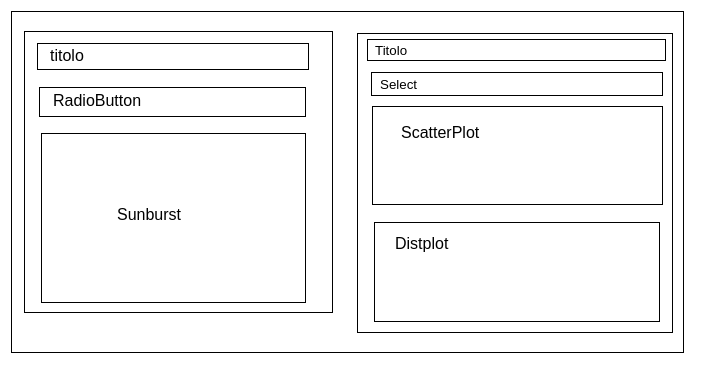


Usate i seguenti componenti:

- dbc.Row()
- dbc.Col()
- dbc.Stack()

Per aiutarvi,fate riferimento ai grafici delle lezioni precedenti.

In [16]:
import pandas as pd
import dash_bootstrap_components as dbc
from dash import Dash, Input, Output, html, dcc
import plotly.express as px

In [17]:
df_path = "https://github.com/Cinofix/analisi-e-rappresentazione-dati/raw/main/data/penguins_size.csv"
df_penguins = pd.read_csv(df_path)

df_penguins.dropna(inplace = True)
df_penguins.drop(df_penguins[df_penguins["sex"]=="."].index, inplace=True)


radio_sunburst = dbc.RadioItems(
            options=[
                {"label":"island", "value":"island"},
                {"label":"species", "value":"species"},
                {"label":"sex", "value":"sex"}
            ],
            value="island",
            inline=True,
            id="first-choice-id"
          )

select_color = dbc.Select(
                  id="select-color-id",
                  options=[
                      {"label": "species", "value": "species"},
                      {"label": "island", "value": "island"},
                      {"label": "sex", "value": "sex"},
                  ],
                  value="species",
                )

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
              # Riga che contiene i due grafici
              dbc.Row([
                    dbc.Col(
                        dbc.Stack([
                          html.H2("Sunburst Chart"),
                          radio_sunburst, # inserisci componente RadioItem
                          dcc.Graph(id="sunburst-graph")
                        ]),
                      width="6"
                    ),

                    dbc.Col(
                        dbc.Stack([
                            html.H2("Scatterplot and distplot"),
                            select_color, # inserisci componente Select
                            dcc.Graph(id="scatterplot-color"),
                            dcc.Graph(id="distplot-color")
                        ]),
                      width="6"
                    )

              ])
            ], fluid=True)

@app.callback(Output('sunburst-graph', 'figure'),
              Input('first-choice-id', 'value'))
def update_sunburst(first_category):
  category_list = []
  if first_category == "island":
    category_list = ['island', 'species', 'sex']

  elif first_category == "species":
    category_list = ['species', "island", 'sex']

  elif first_category == "sex":
    category_list = ["sex", 'island', 'species']

  fig_sunburst_penguin = px.sunburst(df_penguins, path=category_list)
  fig_sunburst_penguin.update_layout(margin=dict(l=50, r=50, t=50, b=50))
  return fig_sunburst_penguin


@app.callback(Output('scatterplot-color', 'figure'),
          Input('select-color-id', 'value'))
def update_scatterplot(plot_color):
  scatterplot_penguin = px.scatter(df_penguins, x='culmen_length_mm', y='culmen_depth_mm', title="culmen_length_mm x culmen_depth_mm", color=plot_color)

  scatterplot_penguin.update_layout(margin=dict(l=50, r=50, t=50, b=50))
  return scatterplot_penguin


@app.callback(Output('distplot-color', 'figure'),
          Input('select-color-id', 'value'))
def update_distplot(distplot_color):
  distplot_penguin = px.histogram(df_penguins, x="culmen_length_mm", color=distplot_color, marginal="violin", title='Distplot della lunghezza delle pinne')
  distplot_penguin.update_layout(margin=dict(l=50, r=50, t=50, b=50))
  return distplot_penguin

app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [ ]:
df_path = "https://github.com/Cinofix/analisi-e-rappresentazione-dati/raw/main/data/penguins_size.csv"
df_penguins = pd.read_csv(df_path)

df_penguins.dropna(inplace = True)
df_penguins.drop(df_penguins[df_penguins["sex"]=="."].index, inplace=True)


radio_sunburst = # riempite questo

select_color = dbc.Select(id="select-color-id",
                  options=[
                      {"label": "species", "value": "species"},
                      {"label": "island", "value": "island"},
                      {"label": "sex", "value": "sex"},
                  ],
                  value="species",
                )

app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = dbc.Container([
              # Riga che contiene i due grafici
              dbc.Row([
                    dbc.Col(
                        dbc.Stack([
                          html.H2("Sunburst Chart"),
                          radio_sunburst, # inserisci componente RadioItem
                          dcc.Graph(id="sunburst-graph") # crea callback per il sunburst
                        ]),
                      width="6"
                    ),

                    dbc.Col(
                        dbc.Stack([
                            html.H2("Scatterplot and distplot"),
                            select_color, # inserisci componente Select
                            dcc.Graph(id="scatterplot-color"),  # crea callback per lo scatterplot
                            dcc.Graph(id="distplot-color") # crea callback per il distplot
                        ]),
                      width="6"
                    )

              ])
            ], fluid=True)

#@app.callback(Output('sunburst-graph', 'figure'),
#              Input(RIEMPI CORRETTAMENTE))
def update_sunburst(radio_value):
  category_list = []
  if radio_value == "island":
    category_list = ['island', 'species', 'sex']

  elif radio_value == "species":
    category_list = ['species', "island", 'sex']

  elif radio_value == "sex":
    category_list = ["sex", 'island', 'species']

  fig_sunburst_penguin = # crea il sunburst con il category_list
  fig_sunburst_penguin.update_layout(margin=dict(l=50, r=50, t=50, b=50))
  return fig_sunburst_penguin


@app.callback(Output('scatterplot-color', 'figure'),
          Input('select-color-id', 'value'))
def update_sunburst(plot_color):
  scatterplot_penguin = # crea e restituisci uno scatterplot impostando il colore dato in input
  scatterplot_penguin.update_layout# aggiusta i margini con spazio 50 ad ogni direzione
  return scatterplot_penguin
"""
# CREA CALLBACK PER IL DISTPLOT
def update_distplot(distplot_color):
# CREA IL GRAFICO E RESTITUISCILO
"""

app.run_server(debug=True)
